In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Arial Unicode MS']  # Mac常用中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [23]:
# 模拟数据生成函数 (用于演示)
def generate_mock_data():
    """生成模拟数据，结构与原图对应"""
    data = {}  # 确保这行在函数开头

    # 图1: GDP增长趋势 & 预测变化
    actual_gdp = [5.0, 5.3, 5.3, 4.7, 4.6, 5.4, 5.4, 5.2]  # 8个季度的实际值 (2023Q3 - 2025Q2)
    forecast_median = [4.7, 4.1, 4.1, 4.1, 4.4, 4.6, 4.2]   # 7个季度的预测值 (2025Q3 - 2026Q4)
    forecast_upper = [5.1, 4.5, 4.5, 4.5, 4.8, 5.0, 4.6]
    forecast_lower = [4.3, 3.7, 3.7, 3.7, 4.0, 4.2, 3.8]

    total_periods = len(actual_gdp) + len(forecast_median)  # 15

    # 关键修复：使用 '3MS' 频率，从2023年9月1日开始，每3个月的开始
    dates_gdp = pd.date_range(start='2023-09-01', periods=total_periods, freq='3MS')

    # 构建完整的、长度对齐的序列
    actual_series = actual_gdp + [np.nan] * len(forecast_median)
    forecast_median_series = [np.nan] * len(actual_gdp) + forecast_median
    forecast_upper_series = [np.nan] * len(actual_gdp) + forecast_upper
    forecast_lower_series = [np.nan] * len(actual_gdp) + forecast_lower

    data['gdp_trend'] = {
        'dates': dates_gdp,
        'actual': actual_series,
        'forecast_median': forecast_median_series,
        'forecast_upper': forecast_upper_series,
        'forecast_lower': forecast_lower_series,
    }

    # 图1右侧: GDP增速预测变化 (2025Q3 - 2027Q1)
    pred_dates = pd.date_range(start='2025-09-01', end='2027-03-01', freq='Q')
    data['gdp_forecast_change'] = {
        'dates': pred_dates,
        'sep_2025': [4.7, 4.4, 4.3, 4.2, 4.1, 4.0, 4.0, 4.1, 4.4, 4.6, 4.2],  # 25年9月预测
        'mar_2025': [4.5, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.3],  # 25年3月预测
        'jun_2025': [4.4, 4.1, 4.0, 4.0, 4.1, 4.4, 4.4, 4.4, 4.4, 4.3, 4.2],  # 25年6月预测
    }

    # 图2: GDP增速构成 (从1980年到2025年上半年)
    years = np.arange(1980, 2026, 0.5)  # 半年度数据
    # 模拟三大需求贡献
    consumption = np.random.uniform(1, 4, len(years))  # 最终消费支出
    investment = np.random.uniform(0.5, 3, len(years))  # 资本形成总额
    net_export = np.random.uniform(-2, 2, len(years))   # 净出口
    # 总GDP增速
    gdp_growth = consumption + investment + net_export

    data['gdp_composition'] = {
        'years': years,
        'consumption': consumption,
        'investment': investment,
        'net_export': net_export,
        'gdp_growth': gdp_growth,
    }

    # 图3: PMI指数 (2015-2025)
    pmi_dates = pd.date_range(start='2015-01-01', end='2025-09-01', freq='M')
    official_manu = np.random.uniform(48, 53, len(pmi_dates))

    caixin_manu = np.random.uniform(47, 54, len(pmi_dates))
    official_service = np.random.uniform(49, 55, len(pmi_dates))
    caixin_service = np.random.uniform(48, 56, len(pmi_dates))

    data['pmi'] = {
        'dates': pmi_dates,
        'official_manu': official_manu,
        'caixin_manu': caixin_manu,
        'official_service': official_service,
        'caixin_service': caixin_service,
    }

    # 图4: 信心指数
    confidence_dates = pd.date_range(start='2015-01-01', end='2025-09-01', freq='M')
    consumer_confidence = np.random.uniform(80, 130, len(confidence_dates))
    employment_confidence = np.random.uniform(70, 120, len(confidence_dates))
    consumer_willingness = np.random.uniform(85, 115, len(confidence_dates))
    pmi_activity_manu = np.random.uniform(45, 60, len(confidence_dates))
    pmi_activity_service = np.random.uniform(50, 65, len(confidence_dates))

    data['confidence'] = {
        'dates': confidence_dates,
        'consumer_confidence': consumer_confidence,
        'employment_confidence': employment_confidence,
        'consumer_willingness': consumer_willingness,
        'pmi_activity_manu': pmi_activity_manu,
        'pmi_activity_service': pmi_activity_service,
    }


# 图5: 消费数据
    retail_dates = pd.date_range(start='2015-02-01', end='2025-09-01', freq='M')
    retail_total = np.random.uniform(-5, 15, len(retail_dates))
    online_retail = np.random.uniform(-10, 25, len(retail_dates))
    auto_sales = np.random.uniform(-20, 30, len(retail_dates))
    telecom_sales = np.random.uniform(-10, 20, len(retail_dates))
    appliance_sales = np.random.uniform(-10, 25, len(retail_dates))

    data['retail'] = {
        'dates': retail_dates,
        'retail_total': retail_total,
        'online_retail': online_retail,
        'auto_sales': auto_sales,
        'telecom_sales': telecom_sales,
        'appliance_sales': appliance_sales,
    }

    return data

# 生成模拟数据
mock_data = generate_mock_data()

/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_97074/2728646094.py:32: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pred_dates = pd.date_range(start='2025-09-01', end='2027-03-01', freq='Q')
/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_97074/2728646094.py:58: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pmi_dates = pd.date_range(start='2015-01-01', end='2025-09-01', freq='M')
/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_97074/2728646094.py:74: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  confidence_dates = pd.date_range(start='2015-01-01', end='2025-09-01', freq='M')
/var/folders/xw/n8d_gn89383dctwyvrp_drr40000gn/T/ipykernel_97074/2728646094.py:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retail_dates = pd.date_range(start

## 图1: 中国经济：总量增长趋势

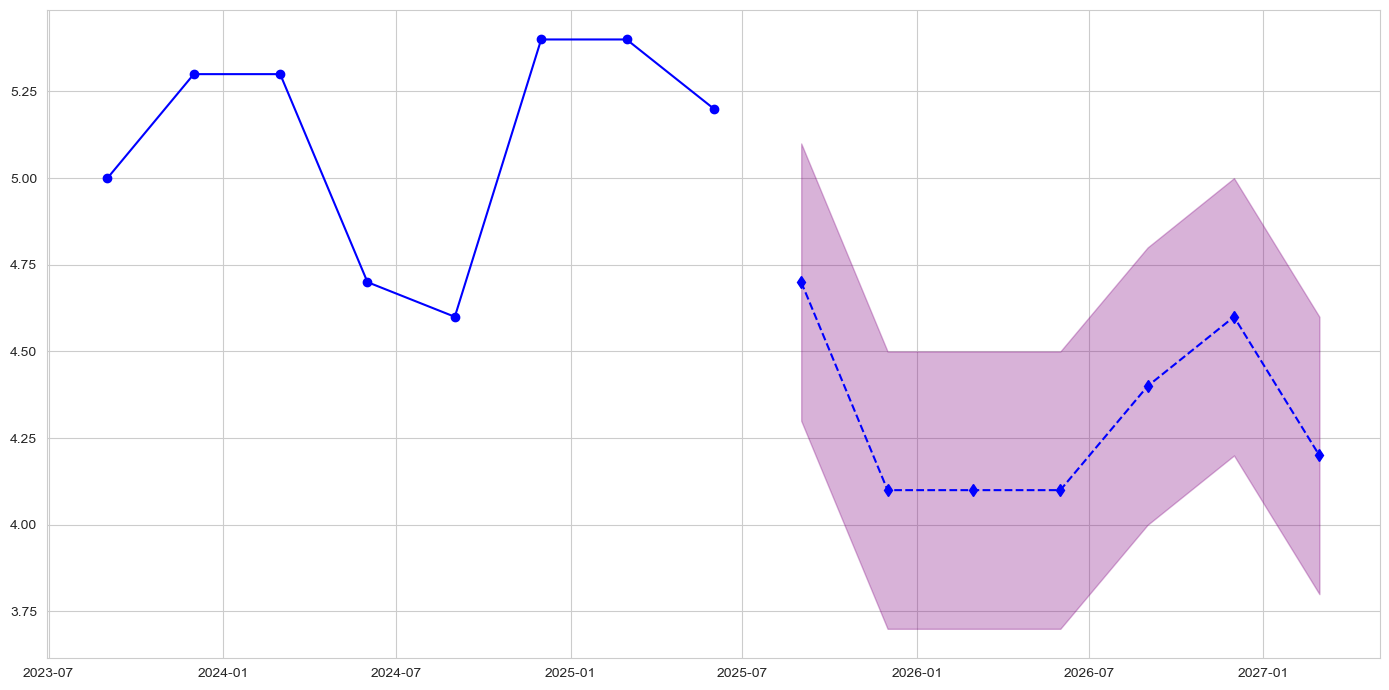

In [24]:
def plot_gdp_trend(data):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 现在 data['dates'], data['actual'], data['forecast_median'] 长度都是15，可以直接绘图
    ax1.plot(data['dates'], data['actual'], marker='o', color='blue', label='实际同比')
    ax1.plot(data['dates'], data['forecast_median'], marker='d', color='blue', linestyle='--', label='预测中位数')
    ax1.fill_between(data['dates'], data['forecast_lower'], data['forecast_upper'],
                     color='purple', alpha=0.3, label='预测中枢区间')

    # ... (其余代码保持不变，包括添加标签、虚线、图例等) ...

    plt.tight_layout()
    plt.show()
plot_gdp_trend(mock_data['gdp_trend'])

## 图2: 中国经济：GDP增速构成

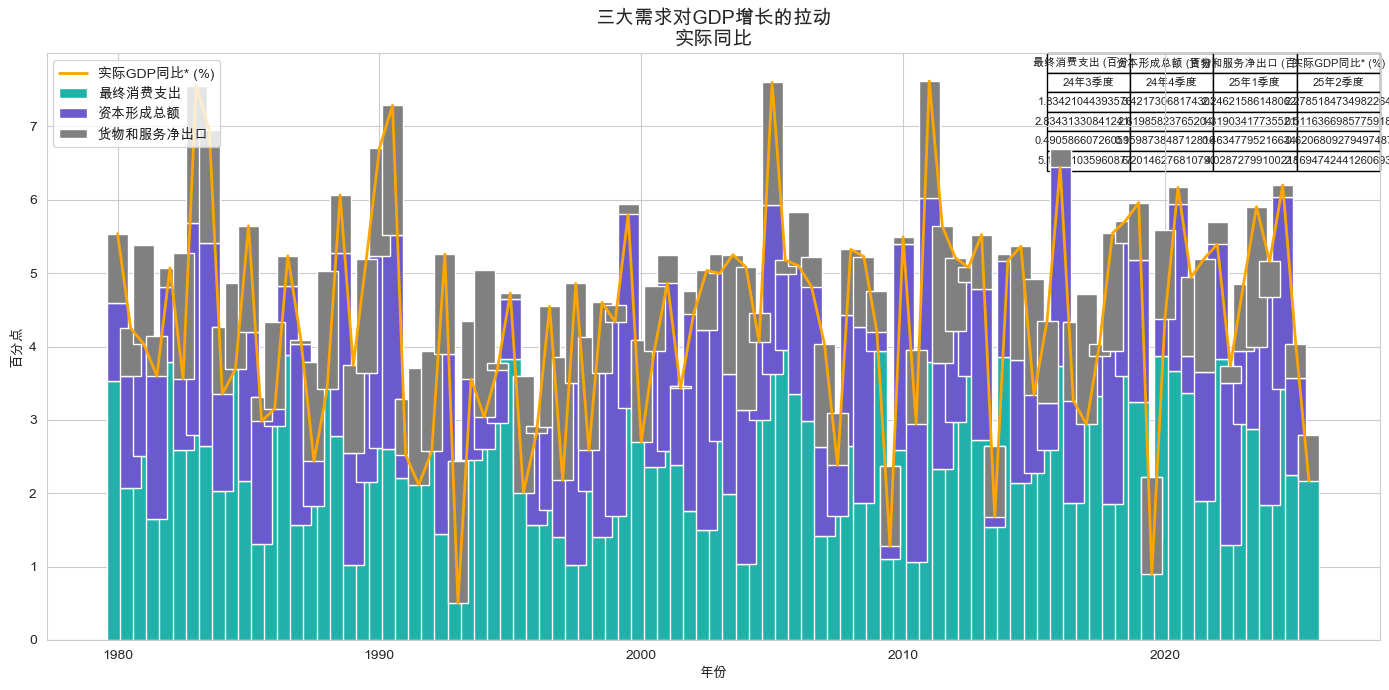

In [10]:
def plot_gdp_composition(data):
    fig, ax = plt.subplots(figsize=(14, 7))

    # 创建堆叠柱状图
    ax.bar(data['years'], data['consumption'], label='最终消费支出', color='#20B2AA')  # 浅青色
    ax.bar(data['years'], data['investment'], bottom=data['consumption'], label='资本形成总额', color='#6A5ACD')  # 紫色
    ax.bar(data['years'], data['net_export'], bottom=data['consumption'] + data['investment'],
           label='货物和服务净出口', color='#808080')  # 灰色

    # 绘制总GDP增速折线
    ax.plot(data['years'], data['gdp_growth'], color='orange', linewidth=2, label='实际GDP同比* (%)')

    # 设置坐标轴和标题
    ax.set_title('三大需求对GDP增长的拉动\n实际同比', fontsize=14)
    ax.set_ylabel('百分点')
    ax.set_xlabel('年份')
    ax.legend(loc='upper left')

    # 在右上角添加表格
    table_data = [
        ['24年3季度', '24年4季度', '25年1季度', '25年2季度'],
        [data['consumption'][-4], data['consumption'][-3], data['consumption'][-2], data['consumption'][-1]],
        [data['investment'][-4], data['investment'][-3], data['investment'][-2], data['investment'][-1]],
        [data['net_export'][-4], data['net_export'][-3], data['net_export'][-2], data['net_export'][-1]],
        [data['gdp_growth'][-4], data['gdp_growth'][-3], data['gdp_growth'][-2], data['gdp_growth'][-1]]
    ]
    table = ax.table(cellText=table_data, colLabels=['最终消费支出 (百分点)', '资本形成总额 (百分点)',
                                                   '货物和服务净出口 (百分点)', '实际GDP同比* (%)'],
                    cellLoc='center', loc='upper right', bbox=[0.75, 0.8, 0.25, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_gdp_composition(mock_data['gdp_composition'])

## 图3: 中国经济：采购经理指数 (PMI)

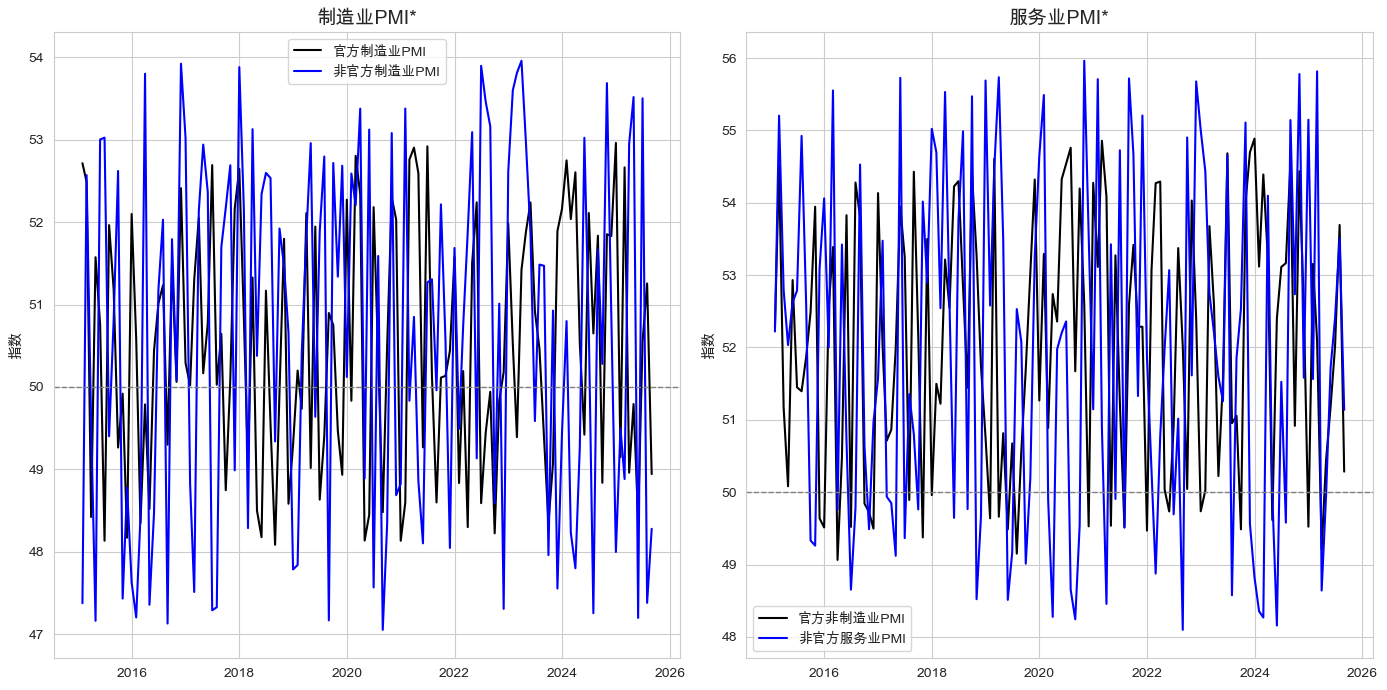

In [11]:
def plot_pmi(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 制造业PMI
    ax1.plot(data['dates'], data['official_manu'], color='black', label='官方制造业PMI')
    ax1.plot(data['dates'], data['caixin_manu'], color='blue', label='非官方制造业PMI')
    ax1.axhline(y=50, color='gray', linestyle='--', linewidth=1)
    ax1.set_title('制造业PMI*', fontsize=14)
    ax1.set_ylabel('指数')
    ax1.legend()

    # 服务业PMI
    ax2.plot(data['dates'], data['official_service'], color='black', label='官方非制造业PMI')
    ax2.plot(data['dates'], data['caixin_service'], color='blue', label='非官方服务业PMI')
    ax2.axhline(y=50, color='gray', linestyle='--', linewidth=1)
    ax2.set_title('服务业PMI*', fontsize=14)
    ax2.set_ylabel('指数')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_pmi(mock_data['pmi'])

## 图4: 中国经济：居民和企业信心

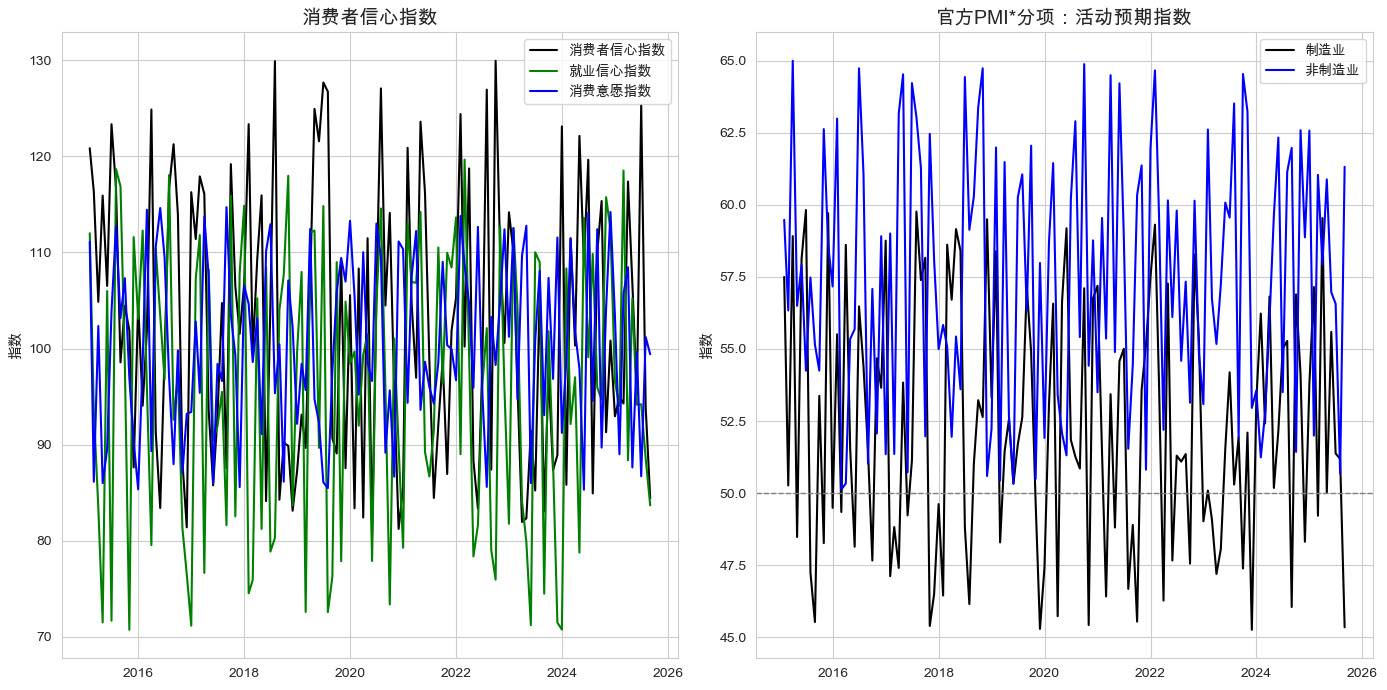

In [12]:
def plot_confidence(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 消费者信心指数
    ax1.plot(data['dates'], data['consumer_confidence'], color='black', label='消费者信心指数')
    ax1.plot(data['dates'], data['employment_confidence'], color='green', label='就业信心指数')
    ax1.plot(data['dates'], data['consumer_willingness'], color='blue', label='消费意愿指数')
    ax1.set_title('消费者信心指数', fontsize=14)
    ax1.set_ylabel('指数')
    ax1.legend()

    # 官方PMI活动预期指数
    ax2.plot(data['dates'], data['pmi_activity_manu'], color='black', label='制造业')
    ax2.plot(data['dates'], data['pmi_activity_service'], color='blue', label='非制造业')
    ax2.axhline(y=50, color='gray', linestyle='--', linewidth=1)
    ax2.set_title('官方PMI*分项：活动预期指数', fontsize=14)
    ax2.set_ylabel('指数')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_confidence(mock_data['confidence'])

##  图5: 中国经济：消费

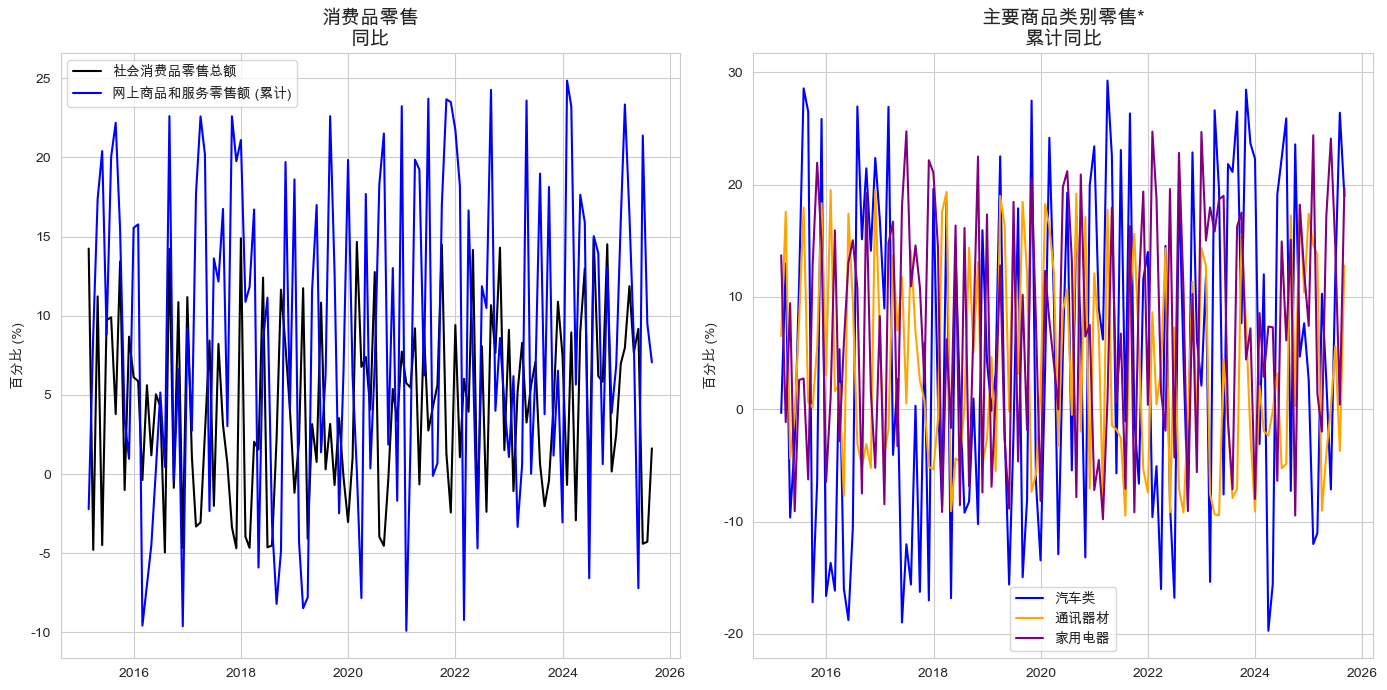

In [13]:
def plot_retail(data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # 消费品零售
    ax1.plot(data['dates'], data['retail_total'], color='black', label='社会消费品零售总额')
    ax1.plot(data['dates'], data['online_retail'], color='blue', label='网上商品和服务零售额 (累计)')
    ax1.set_title('消费品零售\n同比', fontsize=14)
    ax1.set_ylabel('百分比 (%)')
    ax1.legend()

    # 主要商品类别零售
    ax2.plot(data['dates'], data['auto_sales'], color='blue', label='汽车类')
    ax2.plot(data['dates'], data['telecom_sales'], color='orange', label='通讯器材')
    ax2.plot(data['dates'], data['appliance_sales'], color='purple', label='家用电器')
    ax2.set_title('主要商品类别零售*\n累计同比', fontsize=14)
    ax2.set_ylabel('百分比 (%)')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 调用绘图函数
plot_retail(mock_data['retail'])

##  第三步：构建指标评估体系 

###  我们可以为每个核心指标设定一个简单的评估规则。这里我们采用“健康度”评分，分为三个等级：健康 (Green)、关注 (Yellow)、风险 (Red)。

In [14]:
def evaluate_indicators(data):
    """评估关键经济指标"""
    evaluation = {}

    # 1. GDP增长趋势
    latest_gdp = data['gdp_trend']['forecast_median'][-1]  # 最新预测中位数
    if latest_gdp >= 4.5:
        evaluation['gdp_growth'] = '健康'
    elif latest_gdp >= 4.0:
        evaluation['gdp_growth'] = '关注'
    else:
        evaluation['gdp_growth'] = '风险'

    # 2. PMI指数 (取最新值)
    latest_pmi_manu = data['pmi']['official_manu'][-1]
    latest_pmi_service = data['pmi']['official_service'][-1]

    pmi_manu_status = '健康' if latest_pmi_manu > 50 else ('关注' if latest_pmi_manu > 48 else '风险')
    pmi_service_status = '健康' if latest_pmi_service > 50 else ('关注' if latest_pmi_service > 48 else '风险')

    evaluation['pmi_manufacturing'] = pmi_manu_status
    evaluation['pmi_services'] = pmi_service_status

    # 3. 消费者信心 (取最新值)
    latest_consumer_conf = data['confidence']['consumer_confidence'][-1]
    if latest_consumer_conf > 110:
        evaluation['consumer_confidence'] = '健康'
    elif latest_consumer_conf > 90:
        evaluation['consumer_confidence'] = '关注'
    else:
        evaluation['consumer_confidence'] = '风险'

    # 4. 社会消费品零售总额 (取最新值)
    latest_retail = data['retail']['retail_total'][-1]
    if latest_retail > 5:
        evaluation['retail_sales'] = '健康'
    elif latest_retail > 0:
        evaluation['retail_sales'] = '关注'
    else:
        evaluation['retail_sales'] = '风险'

    return evaluation

# 执行评估
eval_results = evaluate_indicators(mock_data)
print("=== 经济指标评估体系 ===")
for key, value in eval_results.items():
    print(f"{key}: {value}")

=== 经济指标评估体系 ===
gdp_growth: 关注
pmi_manufacturing: 关注
pmi_services: 健康
consumer_confidence: 风险
retail_sales: 关注


## 第四步：生成综合评论 

### 最后，根据评估结果，我们可以生成一份简要的分析评论。

In [15]:
def generate_commentary(evaluation):
    """根据评估结果生成评论"""
    commentary = "【中国经济形势综合评论】\n"

    # GDP增长
    gdp_status = evaluation['gdp_growth']
    if gdp_status == '健康':
        commentary += "- **经济增长**：预测中位数维持在较高水平，显示经济基本面稳健，政策支持效果显现。\n"
    elif gdp_status == '关注':
        commentary += "- **经济增长**：预测增速处于温和区间，需关注结构性改革和外部需求变化的影响。\n"
    else:  # 风险
        commentary += "- **经济增长**：预测增速低于警戒线，经济面临下行压力，亟需更强有力的逆周期调节政策。\n"

    # PMI
    manu_status = evaluation['pmi_manufacturing']
    serv_status = evaluation['pmi_services']
    if manu_status == '健康' and serv_status == '健康':
        commentary += "- **景气度**：制造业与服务业PMI均高于荣枯线，表明经济活动整体处于扩张状态。\n"
    elif manu_status == '风险' or serv_status == '风险':
        commentary += "- **景气度**：制造业或服务业PMI已进入收缩区间，反映部分行业面临经营困难，需警惕通缩风险。\n"
    else:
        commentary += "- **景气度**：PMI指数整体处于临界点附近，经济复苏动能尚不稳固，需持续观察后续数据。\n"

    # 消费信心
    conf_status = evaluation['consumer_confidence']
    retail_status = evaluation['retail_sales']
    if conf_status == '健康' and retail_status == '健康':
        commentary += "- **消费动能**：消费者信心高涨，带动零售销售强劲增长，内需成为稳定经济增长的核心动力。\n"
    elif conf_status == '风险' or retail_status == '风险':
        commentary += "- **消费动能**：消费者信心不足或零售销售疲软，反映出居民对未来收入预期偏谨慎，消费潜力有待释放。\n"
    else:
        commentary += "- **消费动能**：消费信心与零售销售处于温和水平，消费市场恢复仍需时间，政策可考虑加大促消费力度。\n"

    commentary += "\n**总结**：当前中国经济正处于关键转型期。尽管面临内外部挑战，但宏观政策空间充足，结构性改革持续推进，长期向好趋势未变。建议投资者保持耐心，关注政策落地效果及高频数据边际变化。"

    return commentary

# 生成并打印评论
final_commentary = generate_commentary(eval_results)
print("\n" + final_commentary)


【中国经济形势综合评论】
- **经济增长**：预测增速处于温和区间，需关注结构性改革和外部需求变化的影响。
- **景气度**：PMI指数整体处于临界点附近，经济复苏动能尚不稳固，需持续观察后续数据。
- **消费动能**：消费者信心不足或零售销售疲软，反映出居民对未来收入预期偏谨慎，消费潜力有待释放。

**总结**：当前中国经济正处于关键转型期。尽管面临内外部挑战，但宏观政策空间充足，结构性改革持续推进，长期向好趋势未变。建议投资者保持耐心，关注政策落地效果及高频数据边际变化。
